# Fake News Detection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\hp\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


# Data Collection

In [7]:
columns = ["id", "label", "statement", "subject", "speaker", "speaker_job", "state", 
           "party", "barely_true_counts", "false_counts", "half_true_counts", 
           "mostly_true_counts", "pants_on_fire_counts", "context"]

In [13]:
train_df=pd.read_csv("C:/Users/hp/Downloads/Liar_fake_news_detection/train.tsv", sep='\t',header=None, names=columns )

In [10]:
test_df=pd.read_csv("C:/Users/hp/Downloads/Liar_fake_news_detection/test.tsv", sep='\t',header=None, names=columns )

In [11]:
valid_df=pd.read_csv("C:/Users/hp/Downloads/Liar_fake_news_detection/valid.tsv", sep='\t',header=None, names=columns )

In [14]:
train_df.head()


,id,label,statement,subject,speaker,speaker_job,state,party,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


In [15]:
test_df.head()

,id,label,statement,subject,speaker,speaker_job,state,party,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context
0,11972.json,true,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30,30,42,23,18,Radio interview
1,11685.json,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference
2,11096.json,false,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.
3,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show
4,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,2,2,7,a web video


In [16]:
valid_df.head()

,id,label,statement,subject,speaker,speaker_job,state,party,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context
0,12134.json,barely-true,We have less Americans working now than in the...,"economy,jobs",vicky-hartzler,U.S. Representative,Missouri,republican,1,0,1,0,0,an interview with ABC17 News
1,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,8,5,105,NaN
2,7891.json,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,a U.S. Ways and Means hearing
3,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,an opinion article
4,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News


In [17]:
# Combine train and valid data for training
df = pd.concat([train_df, valid_df], ignore_index=True)

# Display the first few rows
print(df.head())

           id        label                                          statement  \
0   2635.json        false  Says the Annies List political group supports ...   
1  10540.json    half-true  When did the decline of coal start? It started...   
2    324.json  mostly-true  Hillary Clinton agrees with John McCain "by vo...   
3   1123.json        false  Health care reform legislation is likely to ma...   
4   9028.json    half-true  The economic turnaround started at the end of ...   

                              subject         speaker           speaker_job  \
0                            abortion    dwayne-bohac  State representative   
1  energy,history,job-accomplishments  scott-surovell        State delegate   
2                      foreign-policy    barack-obama             President   
3                         health-care    blog-posting                   NaN   
4                        economy,jobs   charlie-crist                   NaN   

      state       party  barely_true_c

# Data Preprocessing

In [18]:
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
stopwords=set(stopwords.words("english"))

In [21]:
# Simplify labels to binary classification (true vs. false)
def simplify_label(label):
    if label in ["true", "mostly-true", "half-true"]:
        return "true"
    else:
        return "false"

In [22]:
df['label'] = df['label'].apply(simplify_label)

In [25]:
# Function to clean text
def clean_text(text):
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.lower()
    text = ' '.join([word for word in text.split() if word not in stopwords])
    return text

In [26]:
# Apply text cleaning
df['statement'] = df['statement'].apply(clean_text)

In [27]:
# Split the data
X = df['statement']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Vectorize the text
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(X_train).toarray()
X_test = vectorizer.transform(X_test).toarray()

# Model Training

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.6160520607375272
Confusion Matrix:
[[455 520]
 [365 965]]
Classification Report:
              precision    recall  f1-score   support

       false       0.55      0.47      0.51       975
        true       0.65      0.73      0.69      1330

    accuracy                           0.62      2305
   macro avg       0.60      0.60      0.60      2305
weighted avg       0.61      0.62      0.61      2305



# Model Evaluation

AUC: 0.6411436283015232


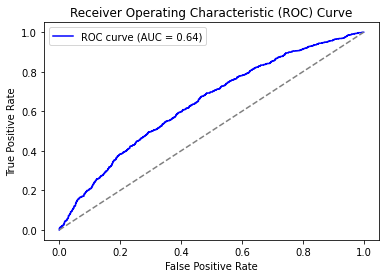

In [30]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Compute predicted probabilities
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label='true')

# Compute AUC
auc = roc_auc_score(y_test, y_prob)
print(f"AUC: {auc}")

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [33]:
import joblib

# Save the model
joblib.dump(model, 'liar_fake_news_detector.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

# Load the model (for later use)
loaded_model = joblib.load('liar_fake_news_detector.pkl')
loaded_vectorizer = joblib.load('tfidf_vectorizer.pkl')

# Example usage
def predict_fake_news(text):
    clean_text_statement = clean_text(text)
    vectorized_text = loaded_vectorizer.transform([clean_text_statement])
    prediction = loaded_model.predict(vectorized_text)
    return prediction[0]

# Test the prediction function
print(predict_fake_news("This is a sample news text to test if it's fake or not."))

false


In [37]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
dt=DecisionTreeClassifier()

In [44]:
# Train the model
dt.fit(X_train, y_train)

# Make predictions
y_dt_pred = dt.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_dt_pred)
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_dt_pred))
print("Classification Report:")
print(classification_report(y_test, y_dt_pred))


Accuracy: 0.5553145336225597
Confusion Matrix:
[[444 531]
 [494 836]]
Classification Report:
              precision    recall  f1-score   support

       false       0.47      0.46      0.46       975
        true       0.61      0.63      0.62      1330

    accuracy                           0.56      2305
   macro avg       0.54      0.54      0.54      2305
weighted avg       0.55      0.56      0.55      2305



In [45]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rf=RandomForestClassifier(max_depth=2, random_state=0)

In [48]:
# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_rf_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_rf_pred)
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_rf_pred))
print("Classification Report:")
print(classification_report(y_test, y_rf_pred))

Accuracy: 0.5770065075921909
Confusion Matrix:
[[   0  975]
 [   0 1330]]
Classification Report:
              precision    recall  f1-score   support

       false       0.00      0.00      0.00       975
        true       0.58      1.00      0.73      1330

    accuracy                           0.58      2305
   macro avg       0.29      0.50      0.37      2305
weighted avg       0.33      0.58      0.42      2305



C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

# Train the model
nb.fit(X_train, y_train)

# Make predictions
y_nb_pred = nb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_nb_pred)
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_nb_pred))
print("Classification Report:")
print(classification_report(y_test, y_nb_pred))

Accuracy: 0.5080260303687636
Confusion Matrix:
[[752 223]
 [911 419]]
Classification Report:
              precision    recall  f1-score   support

       false       0.45      0.77      0.57       975
        true       0.65      0.32      0.42      1330

    accuracy                           0.51      2305
   macro avg       0.55      0.54      0.50      2305
weighted avg       0.57      0.51      0.49      2305

